In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
root = Path(os.getcwd()).parent.parent

#Change for each one of where your data is. For me in Dataset I have all the three folders
parent_directory = os.path.dirname(root)
dataset_path = os.path.join(root,'Dataset')

ADVOCATE = "advocate"
RATEBEER = "ratebeer"
MATCHED = "matched"

ADVOCATE_PATH = os.path.join(dataset_path,ADVOCATE)
RATEBEER_PATH = os.path.join(dataset_path,RATEBEER)
MATCHED_PATH = os.path.join(dataset_path,MATCHED)

In [3]:
ratings_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'ratings-advocate.csv'))
ratings_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'ratings.csv'))

beers_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'beers_cleaned.csv')) #the cleaned one
beers_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'beers_cleaned.csv')) #the cleaned one

In [4]:
beers_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'beers_cleaned.csv')) #the cleaned one
beers_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'beers_cleaned.csv')) #the cleaned one

In [5]:
variance_advocate = ratings_advocate.groupby("beer_id").rating.std()
variance_ratebeer = ratings_ratebeer.groupby("beer_id").rating.std()
variance_advocate.name = 'var_rating'
variance_ratebeer.name = 'var_rating'
print(len(variance_advocate))
print(len(variance_ratebeer))

247982
396690


In [6]:
beers_advocate = beers_advocate.merge(variance_advocate, on='beer_id', how='left') #the std needs at least 2 reviews otherwise it's a Nan
beers_ratebeer = beers_ratebeer.merge(variance_ratebeer, on='beer_id', how='left')


beers_advocate = beers_advocate.dropna(subset='var_rating')
beers_ratebeer = beers_ratebeer.dropna(subset='var_rating')

In [7]:
sem_advocate = ratings_advocate.groupby("beer_id").rating.sem()
sem_ratebeer = ratings_ratebeer.groupby("beer_id").rating.sem()
sem_advocate.name = 'sem_rating'
sem_ratebeer.name = 'sem_rating'

beers_advocate = beers_advocate.merge(sem_advocate, on='beer_id', how='left') #the sem needs at least 2 reviews otherwise it's a Nan
beers_ratebeer = beers_ratebeer.merge(sem_ratebeer, on='beer_id', how='left')


beers_advocate = beers_advocate.dropna(subset='sem_rating')
beers_ratebeer = beers_ratebeer.dropna(subset='sem_rating')

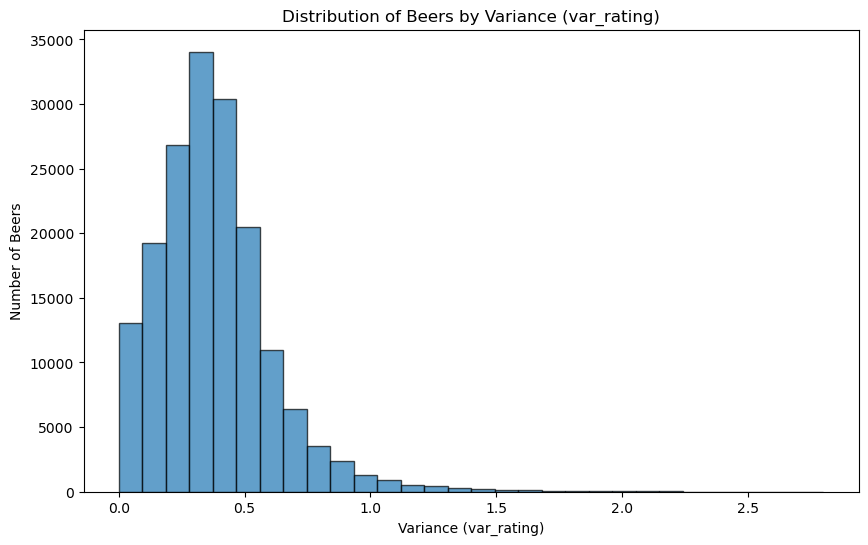

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(beers_advocate['var_rating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Variance (var_rating)')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance (var_rating)')
plt.show()

Text(0.5, 1.0, 'Distribution of Beers by Variance')

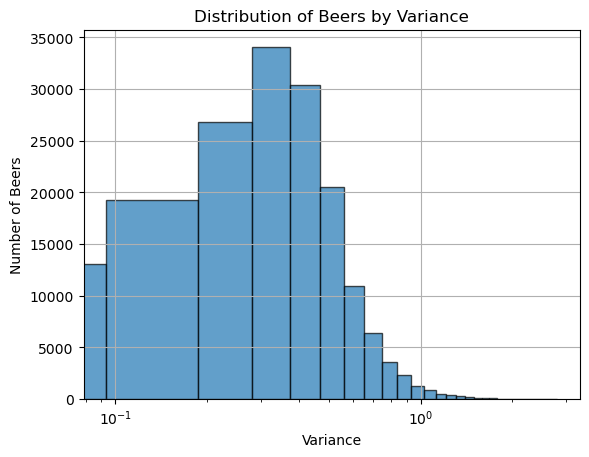

In [9]:
#plt.hist(beers_advocate['var_rating'].dropna(), bins=30, edgecolor='k', alpha=0.7)

beers_advocate.hist(['var_rating'], bins=30,edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Variance')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance')

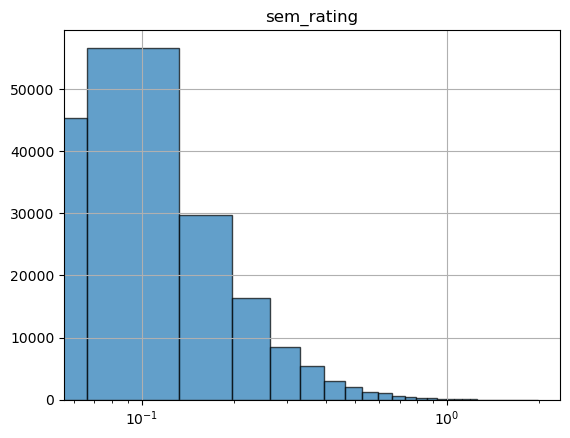

In [10]:
beers_advocate.hist(['sem_rating'], bins=30,edgecolor='k', alpha=0.7)
plt.xscale('log')

In [11]:
ratings_advocate.sample(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
486840,Staročeško Blonde,96159,Pivovara Daruvar d.o.o.,32049,Euro Pale Lager,4.8,1462528800,PsenicnoCRO,psenicnocro.1141192,3.5,3.0,3.0,2.75,2.5,2.83,NaN,False
7423415,Pearl Snap Pils,70018,Austin Beerworks,25667,German Pilsener,5.3,1343556000,zildjian2800,zildjian2800.654154,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False


In [12]:
attributes_of_interest = ["appearance","aroma","palate","taste","overall"] #not abv and style since they are not subject to interpretation. ANd we do not know yet how to analyse text
ratings_advocate_without_nan = ratings_advocate.copy()
ratings_ratebeer_without_nan = ratings_ratebeer.copy()

for attribute in attributes_of_interest:
    ratings_advocate_without_nan = ratings_advocate_without_nan.dropna(subset=attribute)
    ratings_ratebeer_without_nan = ratings_ratebeer_without_nan.dropna(subset=attribute)

print(len(ratings_advocate),len(ratings_advocate_without_nan))
print(len(ratings_ratebeer),len(ratings_ratebeer_without_nan))

8393032 4769675
7122074 7122074


In [13]:
beers_advocate_attribute = beers_advocate.copy()
beers_ratebeer_attribute = beers_advocate.copy()

In [14]:

for attribute in attributes_of_interest:
    print(attribute)
    attribute_advocate = ratings_advocate_without_nan.groupby("beer_id")[attribute].std()
    attribute_ratebeer = ratings_ratebeer_without_nan.groupby("beer_id")[attribute].std()
    attribute_advocate.name = 'var_'+attribute
    attribute_ratebeer.name = 'var_'+attribute
    beers_advocate_attribute = beers_advocate_attribute.merge(attribute_advocate, on='beer_id', how='left') #the sem needs at least 2 reviews otherwise it's a Nan
    beers_ratebeer_attribute = beers_ratebeer_attribute.merge(attribute_ratebeer, on='beer_id', how='left')

for attribute in attributes_of_interest:
    beers_advocate_attribute = beers_advocate_attribute.dropna(subset='var_'+attribute)
    beers_ratebeer_attribute = beers_ratebeer_attribute.dropna(subset='var_'+attribute)
    

appearance
aroma
palate
taste
overall


In [15]:
beers_advocate_attribute.sample()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,var_rating,sem_rating,var_appearance,var_aroma,var_palate,var_taste,var_overall
25184,101208,345 Lager,16049,Cayman Islands Brewery Ltd.,American Adjunct Lager,5,1,2.7,4.5,2.586,1,0.942963,0.421706,0.381881,0.433013,0.57735,0.520416,0.433013


**PCA with rating**

In [33]:
attributes_of_interest_for_PCA = []
for attributes in attributes_of_interest:
    attributes_of_interest_for_PCA.append('var_'+attributes)
attributes_of_interest_for_PCA.append('var_rating')
print(attributes_of_interest_for_PCA)

['var_appearance', 'var_aroma', 'var_palate', 'var_taste', 'var_overall', 'var_rating']


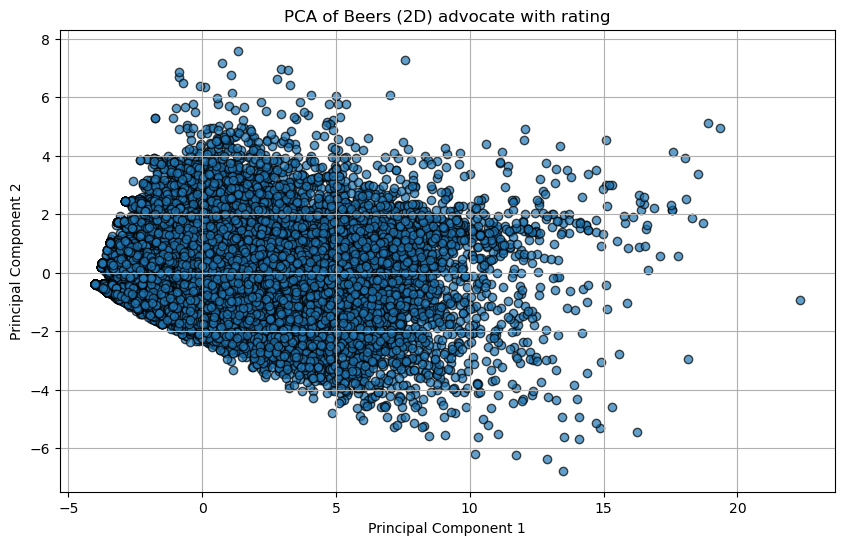

principal components: [[ 0.33299003  0.39596553  0.39949746  0.43295426  0.43738567  0.44042604]
 [ 0.91552743 -0.04596468  0.02288623 -0.28918763 -0.19505305 -0.19364352]]
Explained variance [0.71436526 0.10104952]


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_for_pca = beers_advocate_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) advocate with rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)

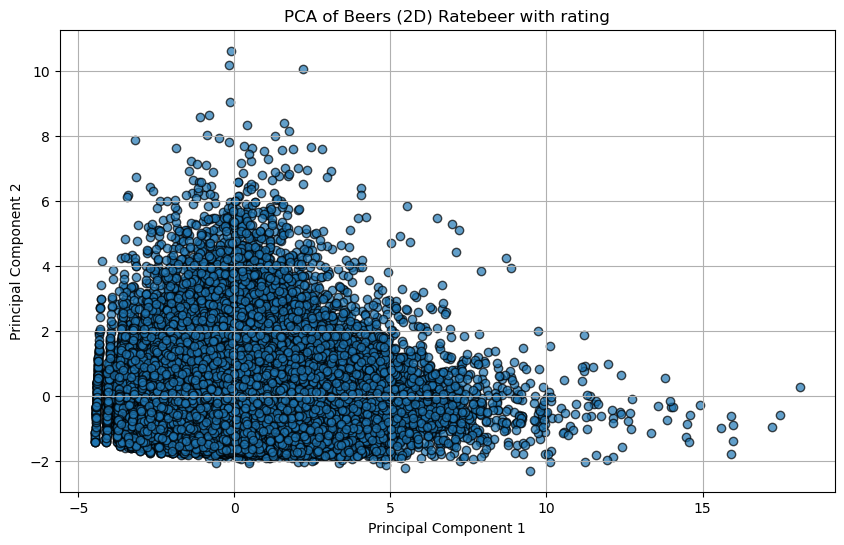

principal components: [[ 3.15911482e-01  4.73952434e-01  3.82864302e-01  5.12309031e-01
   5.14544053e-01  4.20455175e-02]
 [-6.34249907e-02  5.82995396e-03 -6.21719845e-02 -1.80818594e-03
   2.42492745e-04  9.96029416e-01]]
Explained variance [0.45963748 0.16627499]


In [37]:
data_for_pca = beers_ratebeer_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) Ratebeer with rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)


**PCA without rating**

In [38]:
attributes_of_interest_for_PCA = []
for attributes in attributes_of_interest:
    attributes_of_interest_for_PCA.append('var_'+attributes)
print(attributes_of_interest_for_PCA)

['var_appearance', 'var_aroma', 'var_palate', 'var_taste', 'var_overall']


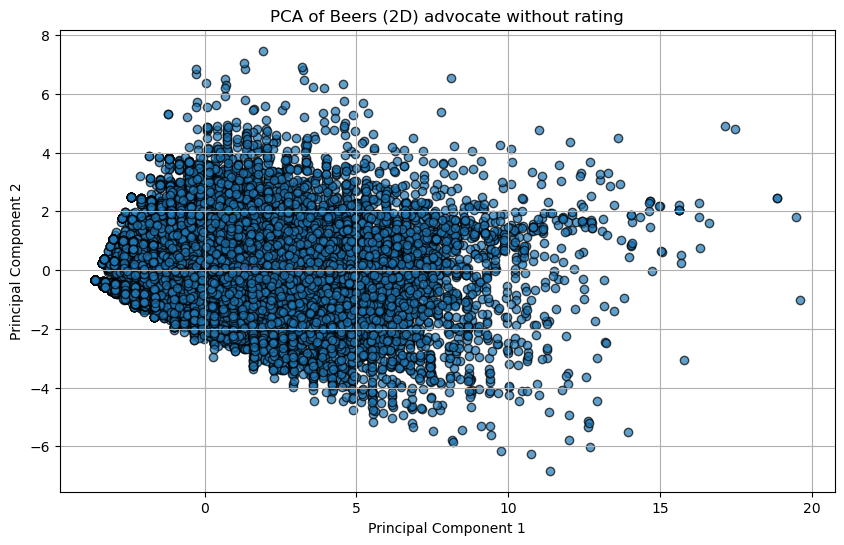

principal components: [[ 0.38165739  0.43953568  0.44928363  0.47411097  0.48426133]
 [ 0.90295285 -0.08575826 -0.06098533 -0.33071501 -0.25343648]]
Explained variance [0.69919473 0.11735947]


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_for_pca = beers_advocate_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca_advocate = PCA(n_components=2)
principal_components = pca_advocate.fit_transform(data_scaled)

pca_df_advocate = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df_advocate['beer_id'] = beers_advocate_attribute['beer_id']

plt.figure(figsize=(10, 6))
plt.scatter(pca_df_advocate['PC1'], pca_df_advocate['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) advocate without rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca_advocate.components_
explained_variance = pca_advocate.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)


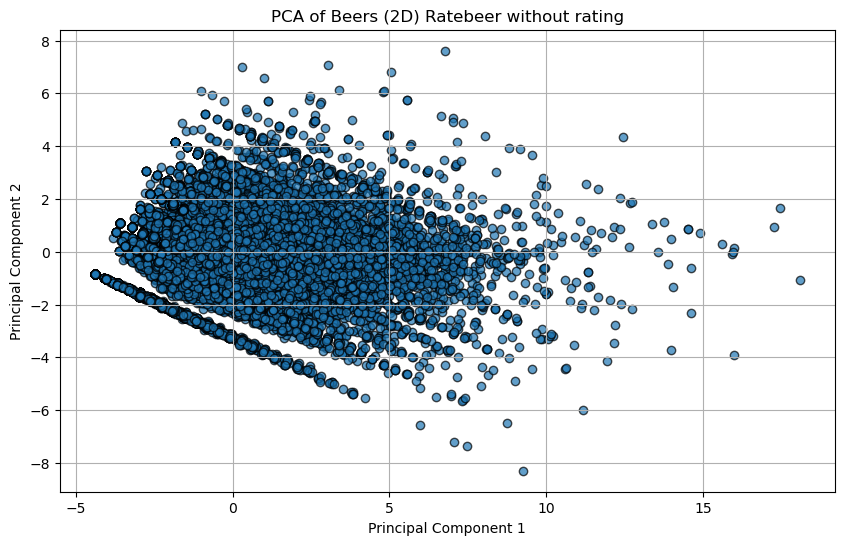

principal components: [[ 0.31627958  0.47429149  0.38337658  0.51273592  0.51491658]
 [ 0.76883209 -0.28666682  0.43061154 -0.28546911 -0.24454129]]
Explained variance [0.55094239 0.17717698]


In [42]:
data_for_pca = beers_ratebeer_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca_ratebeer = PCA(n_components=2)
principal_components = pca_ratebeer.fit_transform(data_scaled)

pca_df_ratebeer = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df_ratebeer['beer_id'] = beers_ratebeer_attribute['beer_id']

plt.figure(figsize=(10, 6))
plt.scatter(pca_df_ratebeer['PC1'], pca_df_ratebeer['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) Ratebeer without rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca_ratebeer.components_
explained_variance = pca_ratebeer.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)


=> for the second principal component the main attribute on which it is projected is the appearance

**Test on pca of df by labeling and see results**

In [43]:
pca_df_advocate['label'] = pca_df_advocate['PC2']>0
beers_advocate_pca = beers_advocate.copy()
beers_advocate_pca = beers_advocate_pca.merge(pca_df_advocate[['label','beer_id']], on='beer_id', how='left')


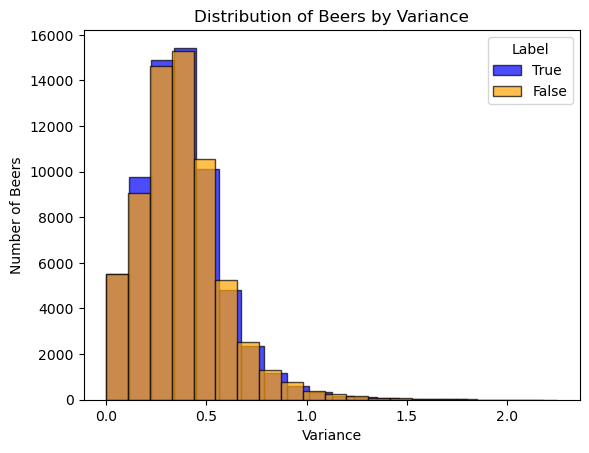

In [44]:
true_data = beers_advocate_pca[beers_advocate_pca['label'] == True]
false_data = beers_advocate_pca[beers_advocate_pca['label'] == False]

# Plot histograms for each subset
plt.hist(true_data['var_rating'], bins=20, edgecolor='k', alpha=0.7, color='blue', label='True')
plt.hist(false_data['var_rating'], bins=20, edgecolor='k', alpha=0.7, color='orange', label='False')

# Log scale for x-axis
#plt.xscale('log')
plt.xlabel('Variance')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance')

# Add legend to distinguish the labels
plt.legend(title="Label")

plt.show()

In [47]:
pca_df_ratebeer['label'] = pca_df_ratebeer['PC2']>0
beers_ratebeer_pca = beers_ratebeer.copy()
beers_ratebeer_pca = beers_ratebeer_pca.merge(pca_df_ratebeer[['label','beer_id']], on='beer_id', how='left')


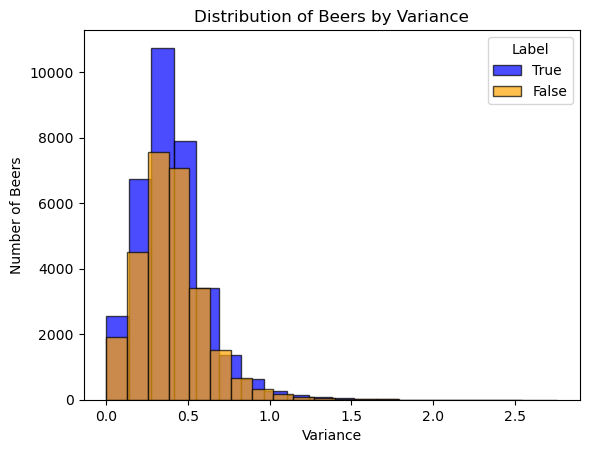

In [48]:
true_data = beers_ratebeer_pca[beers_ratebeer_pca['label'] == True]
false_data = beers_ratebeer_pca[beers_ratebeer_pca['label'] == False]

# Plot histograms for each subset
plt.hist(true_data['var_rating'], bins=20, edgecolor='k', alpha=0.7, color='blue', label='True')
plt.hist(false_data['var_rating'], bins=20, edgecolor='k', alpha=0.7, color='orange', label='False')

# Log scale for x-axis
#plt.xscale('log')
plt.xlabel('Variance')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance')

# Add legend to distinguish the labels
plt.legend(title="Label")

plt.show()

**Do the variance comparison**

(First did for advocate only)

In [65]:
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns


In [100]:
attributes_of_interest = ['var_appearance', 'var_aroma', 'var_palate', 'var_taste', 'var_overall','var_rating']
p_value_table = np.zeros((len(attributes_of_interest),len(attributes_of_interest)))
ci_table = np.zeros((len(attributes_of_interest),len(attributes_of_interest),2))
mean_value_mean = np.zeros((len(attributes_of_interest),len(attributes_of_interest)))
annotations = np.empty(p_value_table.shape, dtype=object)
for i,attribute1 in enumerate(attributes_of_interest):
    for j, attribute2 in enumerate(attributes_of_interest):
        attribute1_variance = beers_advocate_attribute[attribute1]
        attribute2_variance = beers_advocate_attribute[attribute2]

        ttest_result = ttest_ind(attribute1_variance, attribute2_variance)
        ci_t_test_result = ttest_result.confidence_interval(confidence_level=0.95)
        p_value_table[i,j] = ttest_result.pvalue
        ci_table[i,j,0] = ci_t_test_result.low
        ci_table[i,j,1] = ci_t_test_result.high
        mean_value_mean[i,j] = attribute2_variance.mean()
        annotations[i, j] = f"({mean_value_mean[i, j]:.2f} ± {ci_table[i,j,0]:.2f}, {ci_table[i,j,1]:.2f})"


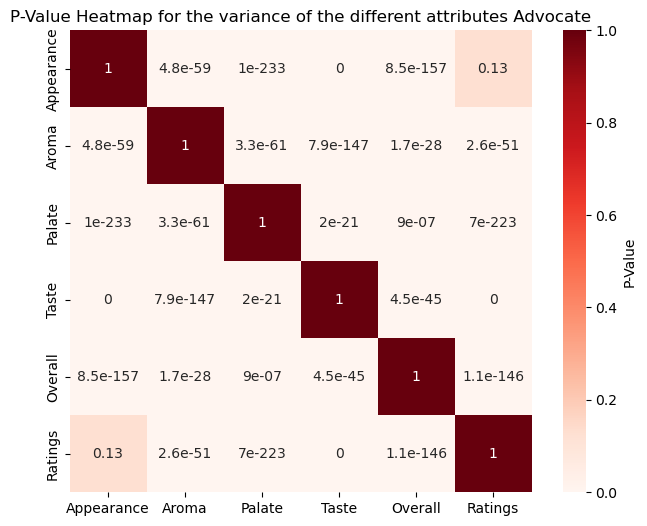

In [101]:
attributes_used = ['Appearance','Aroma','Palate','Taste','Overall','Ratings']
p_value_df = pd.DataFrame(p_value_table, index=attributes_used, columns=attributes_used)

plt.figure(figsize=(8, 6))
sns.heatmap(p_value_df, annot=True, cmap="Reds", vmin=0, vmax=1,square=True, cbar_kws={'label': 'P-Value'})

plt.title("P-Value Heatmap for the variance of the different attributes Advocate")
plt.show()

For significance level of 0.05 we have all diagonals and ratings/appearance that we cannot reject (no significant differene (Homewrok)). For all the other data we can reject the null hypothesis. They should have a different mean, variance (significant difference).

Now let's look at the mean difference.

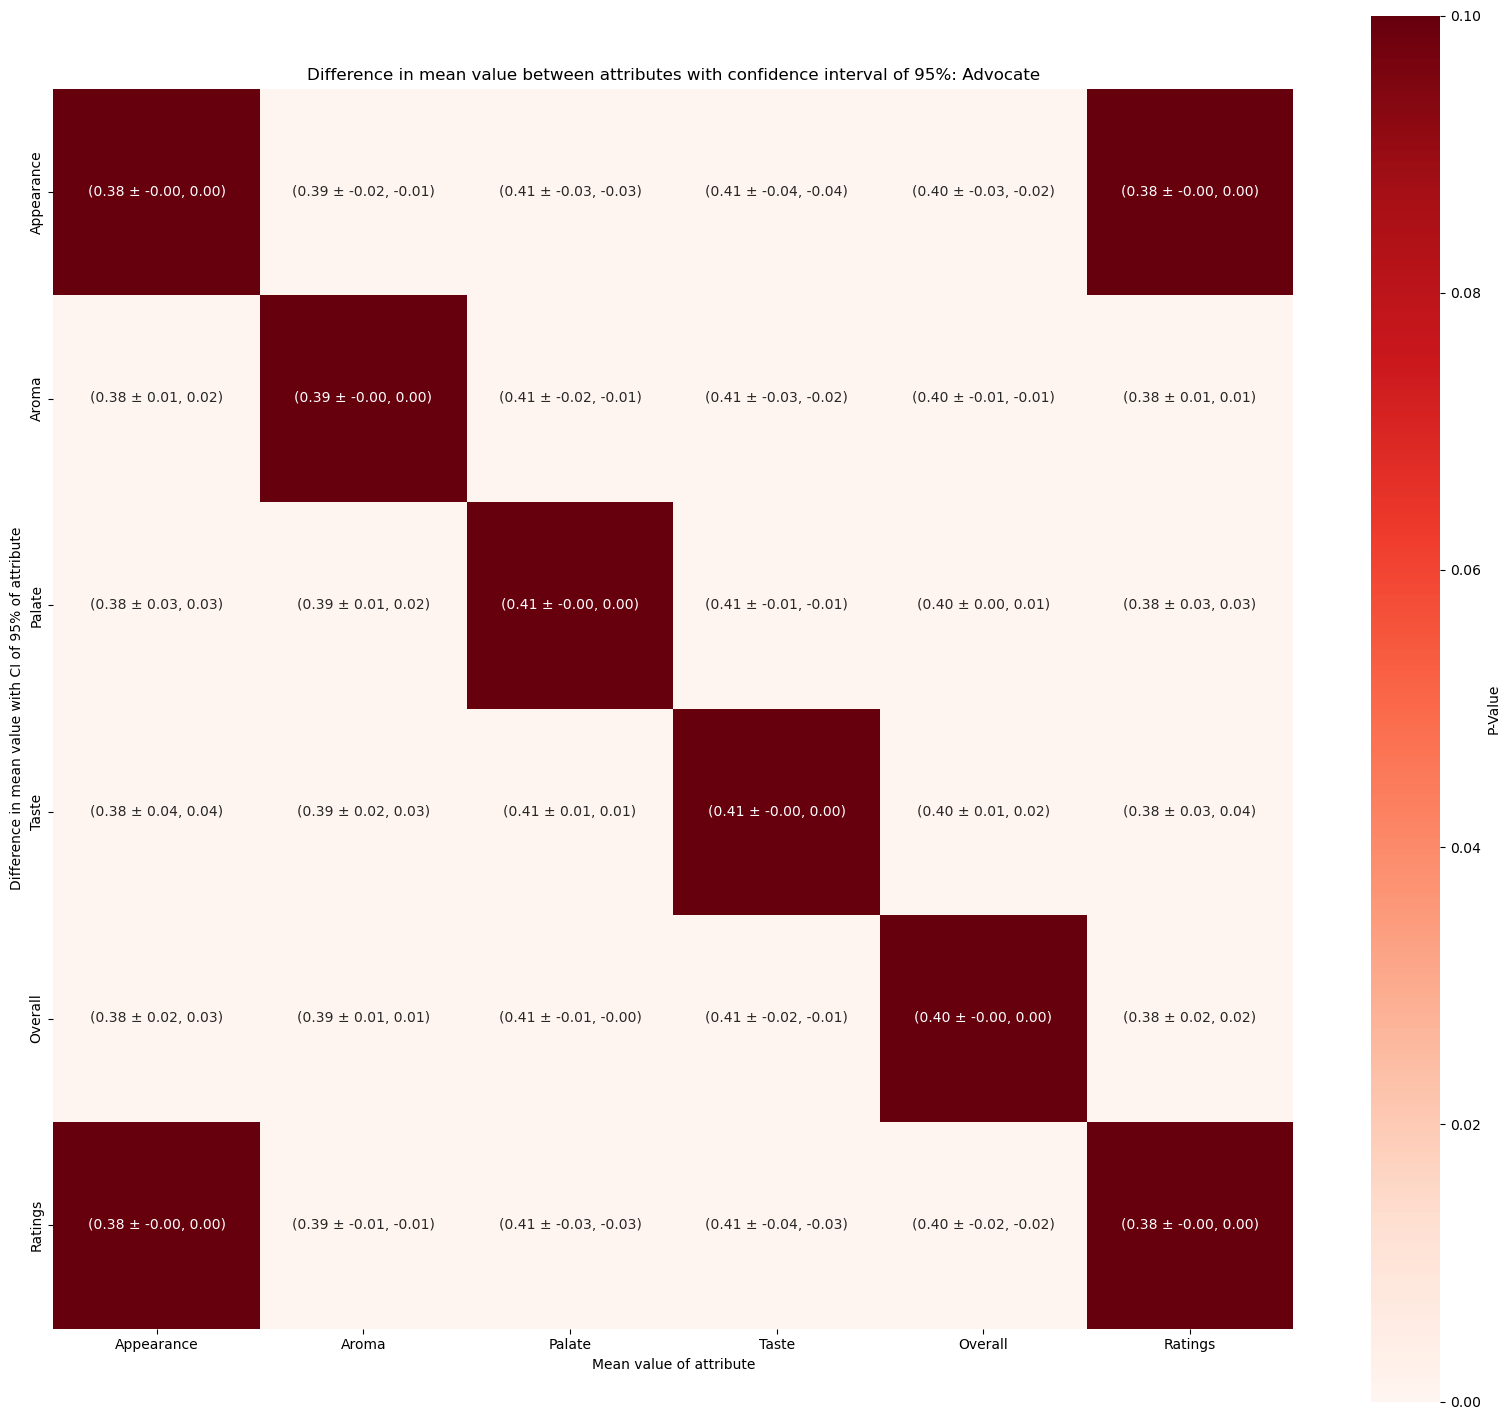

In [107]:
attributes_used = ['Appearance','Aroma','Palate','Taste','Overall','Ratings']
mean_value_df = pd.DataFrame(mean_value_mean, index=attributes_used, columns=attributes_used)

plt.figure(figsize=(20, 18))
sns.heatmap(p_value_df, annot=annotations, cmap="Reds", vmin=0, vmax=0.1,square=True, cbar_kws={'label': 'P-Value'},fmt="")
#sns.heatmap(mean_value_df, annot=True, cmap="Reds", vmin=0, vmax=0.05,square=True, cbar_kws={'label': 'P-Value'})
plt.xlabel("Mean value of attribute")
plt.ylabel("Difference in mean value with CI of 95% of attribute")
plt.title("Difference in mean value between attributes with confidence interval of 95%: Advocate")
plt.show()

In [110]:
attributes_of_interest = ['var_appearance', 'var_aroma', 'var_palate', 'var_taste', 'var_overall','var_rating']
p_value_table = np.zeros((len(attributes_of_interest),len(attributes_of_interest)))
ci_table = np.zeros((len(attributes_of_interest),len(attributes_of_interest),2))
mean_value_mean = np.zeros((len(attributes_of_interest),len(attributes_of_interest)))
annotations = np.empty(p_value_table.shape, dtype=object)
for i,attribute1 in enumerate(attributes_of_interest):
    for j, attribute2 in enumerate(attributes_of_interest):
        attribute1_variance = beers_ratebeer_attribute[attribute1]
        attribute2_variance = beers_ratebeer_attribute[attribute2]

        ttest_result = ttest_ind(attribute1_variance, attribute2_variance)
        ci_t_test_result = ttest_result.confidence_interval(confidence_level=0.95)
        p_value_table[i,j] = ttest_result.pvalue
        ci_table[i,j,0] = ci_t_test_result.low
        ci_table[i,j,1] = ci_t_test_result.high
        mean_value_mean[i,j] = attribute2_variance.mean()
        annotations[i, j] = f"({mean_value_mean[i, j]:.2f} ± {ci_table[i,j,0]:.2f}, {ci_table[i,j,1]:.2f})"


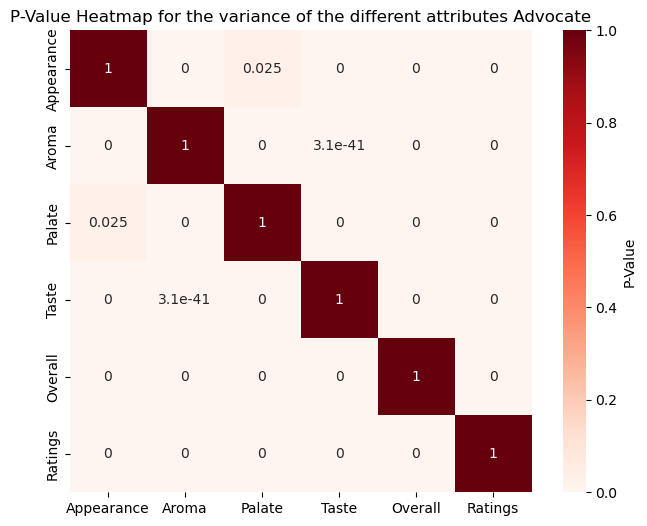

In [111]:
attributes_used = ['Appearance','Aroma','Palate','Taste','Overall','Ratings']
p_value_df = pd.DataFrame(p_value_table, index=attributes_used, columns=attributes_used)

plt.figure(figsize=(8, 6))
sns.heatmap(p_value_df, annot=True, cmap="Reds", vmin=0, vmax=1,square=True, cbar_kws={'label': 'P-Value'})

plt.title("P-Value Heatmap for the variance of the different attributes Advocate")
plt.show()

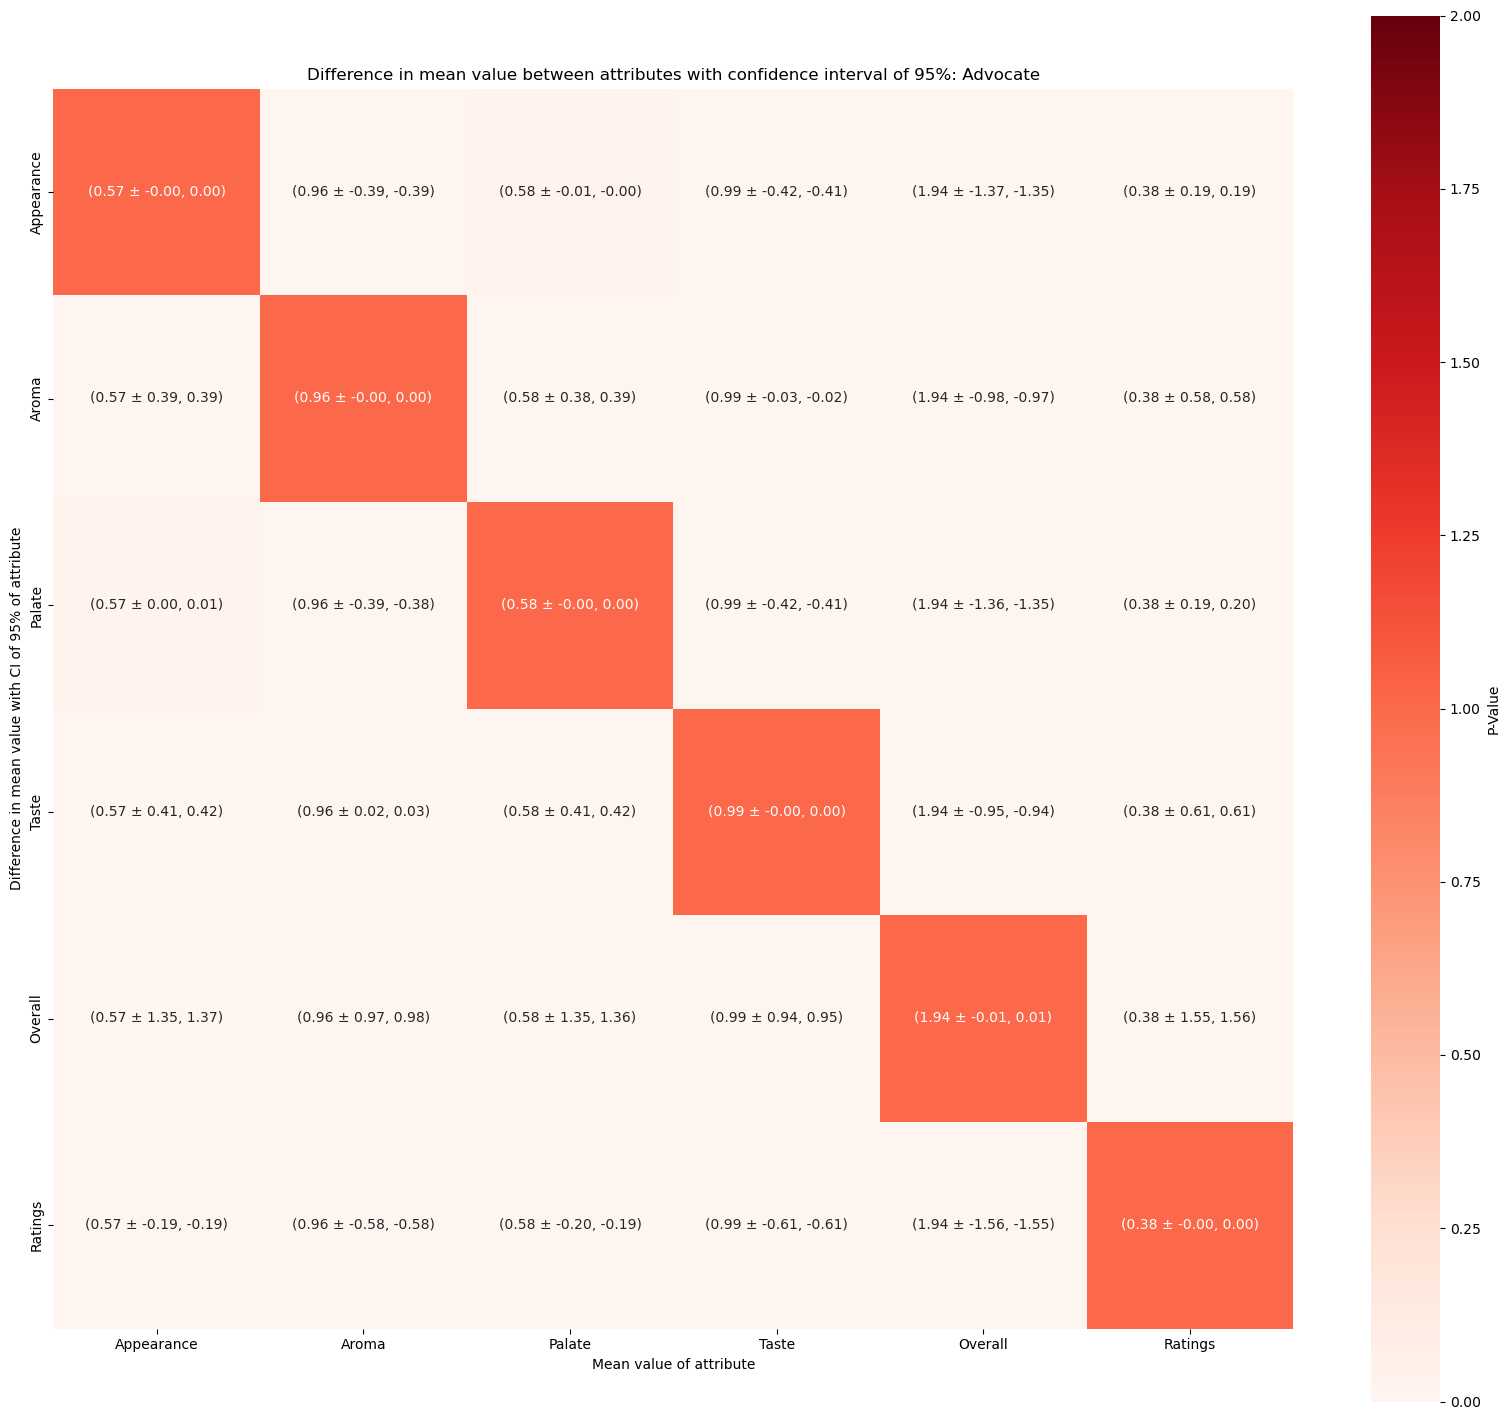

In [117]:
attributes_used = ['Appearance','Aroma','Palate','Taste','Overall','Ratings']
mean_value_df = pd.DataFrame(mean_value_mean, index=attributes_used, columns=attributes_used)

plt.figure(figsize=(20, 18))
sns.heatmap(p_value_df, annot=annotations, cmap="Reds", vmin=0, vmax=2,square=True, cbar_kws={'label': 'P-Value'},fmt="")
#sns.heatmap(mean_value_df, annot=True, cmap="Reds", vmin=0, vmax=0.05,square=True, cbar_kws={'label': 'P-Value'})
plt.xlabel("Mean value of attribute")
plt.ylabel("Difference in mean value with CI of 95% of attribute")
plt.title("Difference in mean value between attributes with confidence interval of 95%: Advocate")
plt.show()